# Inspect RC+S data quality

The `/v2/event.*` endpoint provides metrics summarizing data quality per session, including information on corrupt json files, duration of data, and duration of lost packets. The following template retrieves session meta data and visualizes percent data completion as a proxy of data quality.

In [1]:
import io
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from runeq import Config, stream

## Functions for obtaining session data

In [2]:
def get_session_events(client, params):
    """Makes API calls for session events, outputs dataframe"""

    accessor = client.Event(**params)

    df = pd.DataFrame()
    for page in accessor.iter_json_data():
        df_page = pd.DataFrame(page['event'])
        df = df.append(df_page, ignore_index=True)

    return df

## Function for plotting data quality per session

In [3]:
def plot_session_data_quality(epoch, epoch_data_completion):
    """Plots sessions of data, colored by percentage completion"""

    fig, ax = plt.subplots(figsize=(12, 6))

    for num_epoch, times in enumerate(epoch):
        ax.plot(
            [datetime.datetime.fromtimestamp(times[0]),
             datetime.datetime.fromtimestamp(times[1])],
            [0, 0],
            linewidth=25,
            color='cornflowerblue',
            alpha=epoch_data_completion[num_epoch]
        )

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlabel('Time')
    plt.ylabel('Epochs')
    plt.title('Data Availability')

## 1. Initialize API credentials

In [4]:
# set up client

cfg = Config('~/Documents/api_config/access_token.yaml')
client = stream.V1Client(cfg)

## 2. Specify endpoint parameters and retrieve session events

In [5]:
# initialize parameters for API calls

params = {
    'patient_id': 'RCS02',
    'start_time': 1556694000,
    'end_time': 1559372400,
    'event': 'device.session.end'
}

In [6]:
sessions = get_session_events(client, params)
sessions

,device_id,event_enum,event_namespace,event_type,id,payload,time
0,DeviceNPC700398H,end,device,session,event-RCS02-c993364cff965eba338b5e3daf10db7c78...,"{'duration_data': 188.311, 'duration_lost': 17...",1.557938e+09
1,DeviceNPC700398H,end,device,session,event-RCS02-b68fe1e1f30a07d50b549eff9888e622b5...,"{'duration_data': 467.045, 'duration_lost': 21...",1.557952e+09
2,DeviceNPC700398H,end,device,session,event-RCS02-27dfca35588fa6be47ff9fcb4d14ffc827...,"{'corrupt_json': False, 'duration_data': 30.84...",1.557977e+09
3,DeviceNPC700398H,end,device,session,event-RCS02-29a5f6093211bd4f74346689a8bd988465...,"{'duration_data': 375.793, 'duration_lost': 7....",1.558131e+09
4,DeviceNPC700398H,end,device,session,event-RCS02-e794fc560c9c9f855e867fbe2d6b9563d5...,"{'corrupt_json': False, 'duration_data': 192.7...",1.558132e+09
5,DeviceNPC700398H,end,device,session,event-RCS02-4cbe4665693ad767ab1beec1b18b61b904...,"{'corrupt_json': False, 'duration_data': 3169....",1.558210e+09
6,DeviceNPC700398H,end,device,session,event-RCS02-e5d7296468dc8a1c6a9066fd16087adfc1...,"{'corrupt_json': False, 'duration_data': 22370...",1.558232e+09
7,DeviceNPC700398H,end,device,session,event-RCS02-a7fdf74bd2ad91a557b73ed2bc4ad691c2...,"{'corrupt_json': False, 'duration_data': 970.7...",1.558235e+09
8,DeviceNPC700398H,end,device,session,event-RCS02-22cbd2285f887c240934c04f24dde58904...,"{'corrupt_json': False, 'duration_data': 14927...",1.558252e+09
9,DeviceNPC700398H,end,device,session,event-RCS02-2f34c02edc63e21aafea1cdde70eab9615...,"{'corrupt_json': False, 'duration_data': 10996...",1.558327e+09


## 3. Retrieve sessions and compute data quality metric

In [7]:
# retrieve start/end times for each session

epochs = [
    [row['payload']['t_start'], row.time]
    for index, row in sessions.iterrows()
]

In [8]:
# compute percentage data completion

epoch_data_completion = [
    row['payload']['duration_data'] / row['payload']['duration_session']
    for index, row in sessions.iterrows()
]

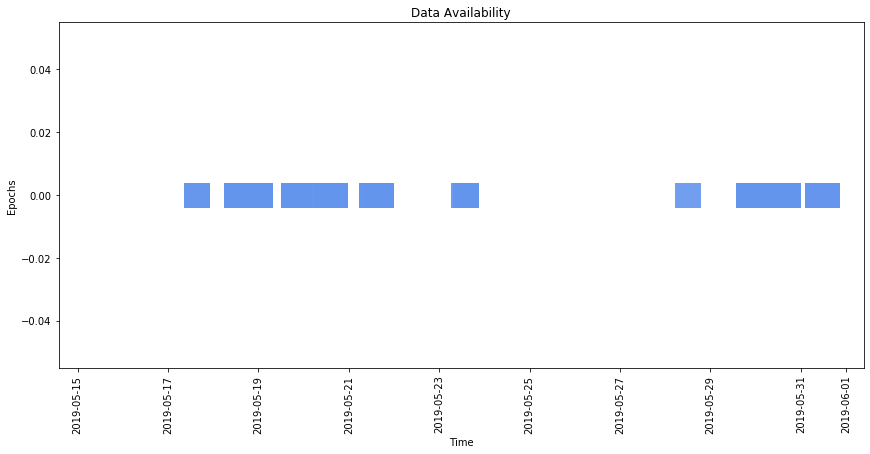

In [9]:
# plot data completion heatmap

plot_session_data_quality(epochs, epoch_data_completion)

Text(0, 0.5, 'Number of Sessions')

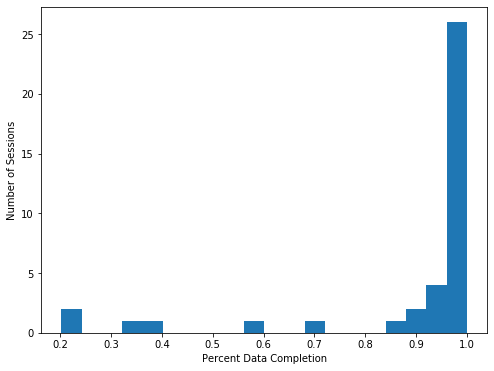

In [10]:
# plot data completion histogram

fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(epoch_data_completion, bins=20)
plt.xlabel('Percent Data Completion')
plt.ylabel('Number of Sessions')

## Summary

Using the `event` endpoint, we obtained session meta data and visualized the completion of data collected from a single subject. The majority of data were >80% complete. A small number of sessions had significant packet loss.

Note that other metrics of data quality can be formulated from the available fields in `payload`, such as quantification of large packet loss vs. small packet loss.